In [14]:
from selenium import webdriver
import time
from time import sleep
from IPython import html
from IPython.core.display import display, HTML
import pickle
import glob
from nbmultitask import ProcessWithLogAndControls
from IPython.display import clear_output
from nbmultitask import ThreadWithLogAndControls
from PIL import Image
import base64
import io
from IPython.display import SVG, display
from cairosvg import svg2png
import pytesseract


def display_svg(data):
    display(SVG(data))

def get_driver():
    options = webdriver.ChromeOptions()
    options.binary_location = "/Applications/Google Chrome 2.app/Contents/MacOS/Google Chrome"
    chrome_driver_binary = "driver/chromedriver"
    driver = webdriver.Chrome(chrome_driver_binary, chrome_options=options)
    return driver

# def login_page(driver):
#     driver.get("https://leetcode.com/accounts/login/")
#     username = driver.find_element_by_name("login")
#     password = driver.find_element_by_name("password")
#     username.send_keys("vishnu-srivastava@hotmail.com")
#     password.send_keys("Saibaba_1")

def save_cookies(driver):
    pickle.dump( driver.get_cookies() , open("cookies.pkl","wb"))
    

def load_cookies(driver):
    cookies = pickle.load(open("cookies.pkl", "rb"))
    for cookie in cookies:
        driver.add_cookie(cookie)
        
# def load_leetcode():
#     driver = get_driver()
#     driver.get('https://leetcode.com/')
#     # login_page(driver)## Please login
#     # save_cookies(driver)
#     load_cookies(driver)
#     driver.get('https://leetcode.com/')
#     return driver
    

In [3]:
driver = get_driver()
driver.get('https://selfregistration.cowin.gov.in/')

<ipython-input-1-c058b8819be1>:26: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_driver_binary, chrome_options=options)


In [4]:
if driver.current_url == 'https://selfregistration.cowin.gov.in/dashboard':
    print('processing !')

processing !


In [21]:
driver.find_element_by_link_text('Refresh').click()

In [5]:
# get base 64 image
img_base64_encoded = driver.find_element_by_id('captchaImage').get_attribute('src').split(',')[-1]
# img_base64_encoded

In [6]:
# decode base 64 image
img_base64_decoded = base64.b64decode(img_base64_encoded)
# img_base64_decoded

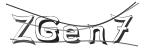

In [7]:
display_svg(img_base64_decoded)

In [8]:
# get rid of all the lines
svg_rows = [x+'>' for x in img_base64_decoded.decode("utf-8").split('>')[:-1] \
            if 'fill="none"' not in x]

# sort characters
svg_rows = [svg_rows[0]] + \
            sorted(svg_rows[1:-1], key=lambda x: float(x.split(' ')[2][4:])) + \
            [svg_rows[-1]]

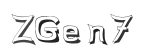

In [9]:
display_svg(''.join(svg_rows))

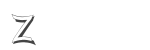

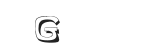

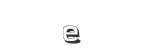

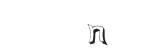

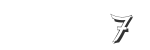

In [31]:
header = '<svg xmlns="http://www.w3.org/2000/svg" width="150" height="50" viewBox="0,0,150,50">'
footer = '</svg>'
# print all characters
for i in range(1, len(svg_rows)-1):
#     svg_rows[i] = svg_rows[i].split(' ')
#     svg_rows[i][2] = 'd="M26.12'
#     svg_rows[i] = ' '.join(svg_rows[i])
    display_svg(header+svg_rows[i]+footer)


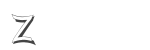

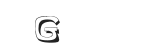

@



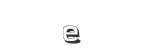

Tl



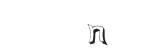

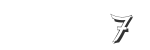

In [36]:
for i in range(1, len(svg_rows)-1):
    # get character
    test_char = header+svg_rows[i]+footer
    png = svg2png(bytestring=test_char)
    
    # get png in pil
    pil_img = Image.open(io.BytesIO(png)).convert('RGBA')
    
    # display cracjed character
    print(pytesseract.image_to_string(pil_img))
    
    # display real character
    display_svg(test_char)